<a href="https://colab.research.google.com/github/julianovale/MCDA/blob/main/0005_AHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Filename: AHP_Final_Rank_Figure.py
# Description: Optional module to plot the
# results of AHP method
# Authors: Papathanasiou, J. & Ploskas, N.

import matplotlib.pyplot as plt
from graphviz import Digraph
from numpy import *

# Plot final rank figure
def graph(scores, b):
    """ scores is the matrix with the scores, and b
    is a string describing the score
    """
    s = Digraph('Actions', node_attr = {'shape':
        'plaintext'})
    s.body.extend(['rankdir = LR'])
    x = sort(scores)
    y = argsort(scores)
    l = []
    for i in y:
        s.node('action' + str(i), '''<
        <TABLE BORDER="0" CELLBORDER="1"
            CELLSPACING="0" CELLPADDING="4">
          <TR>
            <TD COLSPAN="2" bgcolor="grey" >Action
                ''' + str(y[i] + 1) + '''</TD>
          </TR>
          <TR>
            <TD>'''+ b +'''</TD>
            <TD>''' + str(x[i]) + '''</TD>
          </TR>
        </TABLE>>''')
    k = []
    for q in range(len(scores) - 1):
        k.append(['action' + str(q + 1), 'action'
            + str(q)])
    print(k)
    s.edges(k)
    s.view()

# Plot final rank
def plot(a, b):
    """ a is the matrix with the scores, and b
    is a string describing the method
    """
    scores = a
    yaxes_list = [0.2] * size(scores, 0)
    plt.plot(yaxes_list, scores, 'ro')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    plt.axis([0, 0.7, min(scores) - 0.05,
        max(scores) + 0.05])
    plt.title(b + " results")
    plt.ylabel("Scores")
    plt.legend()
    plt.grid(True)
    z1 = []
    for i in range(size(scores, 0)):
        z1.append('   (Action ' + str(i + 1) + ')')
    z = [str(a) + b for a, b in zip(scores, z1)]
    for X, Y, Z in zip(yaxes_list, scores, z):
        plt.annotate('{}'.format(Z), xy = (X, Y),
            xytext=(10, -4), ha = 'left',
            textcoords = 'offset points')
    plt.show()

No handles with labels found to put in legend.


Inconsistency index of the criteria:  0.01610868948440318
Inconsistency index of the alternatives for criterion  1 :  0.03349113123332583
Inconsistency index of the alternatives for criterion  2 :  0.026437064499443722
Inconsistency index of the alternatives for criterion  3 :  0.022144721786307137
Inconsistency index of the alternatives for criterion  4 :  0.039785112041738534
Global priorities =  [0.11737682 0.07132502 0.09472062 0.21164765 0.35008026 0.15484963]


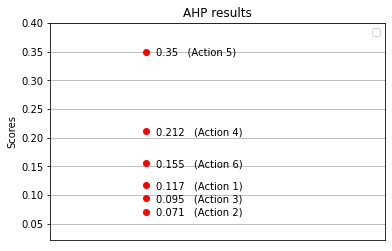

In [2]:
# Filename: AHP.py
# Description: Analytic hierarchy process method
# Authors: Papathanasiou, J. & Ploskas, N.

# from numpy import *
import scipy.sparse.linalg as sc
# import matplotlib.pyplot as plt
# from AHP_Final_Rank_Figure import graph, plot

# normalized column sum method
def norm(x):
    """ x is the pairwise comparison matrix for the 
    criteria or the alternatives
    """
    k = array(sum(x, 0))
    z = array([[round(x[i, j] / k[j], 3) 
		for j in range(x.shape[1])]
        for i in range(x.shape[0])])
    return z

# geometric mean method
def geomean(x):
    """ x is the pairwise comparison matrix for the
	criteria or the alternatives
    """
    z = [1] * x.shape[0]
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] = z[i] * x[i][j]
        z[i] = pow(z[i], (1 / x.shape[0]))
    return z

# AHP method: it calls the other functions
def ahp(PCM, PCcriteria, m, n, c):
    """ PCM is the pairwise comparison matrix for the
	alternatives,  PCcriteria is the pairwise comparison 
	matrix for the criteria, m is the number of the 
	alternatives, n is the number of the criteria, and 
	c is the method to estimate a priority vector (1 for 
	eigenvector, 2 for normalized column sum, and 3 for
    geometric mean)
    """
    # calculate the priority vector of criteria
    if c == 1: # eigenvector
        val, vec = sc.eigs(PCcriteria, k = 1, which = 'LM')
        eigcriteria = real(vec)
        w = eigcriteria / sum(eigcriteria)
        w = array(w).ravel()
    elif c == 2: # normalized column sum
        normPCcriteria = norm(PCcriteria)
        w = array(sum(normPCcriteria, 1) / n)
    else: # geometric mean
        GMcriteria = geomean(PCcriteria)
        w = GMcriteria / sum(GMcriteria)
    # calculate the local priority vectors for the 
	# alternatives
    S = []
    for i in range(n):
        if c == 1: # eigenvector
            val, vec = sc.eigs(PCM[i * m:i * m + m, 0:m],
                k = 1, which = 'LM')
            eigalter = real(vec)
            s = eigalter / sum(eigalter)
            s = array(s).ravel()
        elif c == 2: # normalized column sum
            normPCM = norm(PCM[i*m:i*m+m,0:m])
            s = array(sum(normPCM, 1) / m)
        else: # geometric mean
            GMalternatives = geomean(PCM[i*m:i*m+m,0:m])
            s = GMalternatives / sum(GMalternatives)
        S.append(s)
    S = transpose(S)

    # calculate the global priority vector for the
	# alternatives
    v = S.dot(w.T)

    return v

# main function
def main(a, b, c):
    """ a, b, and c are flags; if a and b are set to 'y' 
	they do print the results, anything else does not 
	print the results. If c equals 1, the eigenvector 
	method is used; if c equals 2, the normalized column 
	sum method is used; otherwise, the geometric mean 
	method is used
	""" 
    # the number of the alternatives
    m = 6

    # the number of the criteria
    n = 4

    # random indices for consistency checking
    RI = [0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41,
        1.45, 1.49]

    # pairwise comparison matrix of the criteria
    PCcriteria = array([[1, 1, 5, 3], [1, 1, 5, 3],
        [1/5, 1/5, 1, 1/3], [1/3, 1/3, 3, 1]])

    # consistency check for pairwise comparison matrix of
    # the criteria
    lambdamax = amax(linalg.eigvals(PCcriteria).real)
    CI = (lambdamax - n) / (n - 1)
    CR = CI / RI[n - 1]
    print("Inconsistency index of the criteria: ", CR)
    if CR > 0.1:
        print("The pairwise comparison matrix of the"
            " criteria is inconsistent")

    # pairwise comparison matrix of the alternatives
    PCM1 = array([[1, 5, 1, 1, 1/3, 3], 
				  [1/5, 1, 1/3, 1/5, 1/7, 1],
				  [1, 3, 1, 1/3, 1/5, 1], 
				  [1, 5, 3, 1, 1/3, 3],
				  [3, 7, 5, 3, 1, 7], 
				  [1/3, 1, 1, 1/3, 1/7, 1]])
    PCM2 = array([[1, 7, 3, 1/3, 1/3, 1/3],
				  [1/7, 1, 1/3, 1/7, 1/9, 1/7], 
				  [1/3, 3, 1, 1/5, 1/5, 1/5],
				  [3, 7, 5, 1, 1, 1], 
				  [3, 9, 5, 1, 1, 1], 
				  [3, 7, 5, 1, 1, 1]])
    PCM3 = array([[1, 1/9, 1/7, 1/9, 1, 1/5], 
				  [9, 1, 1, 1, 5, 3],
				  [7, 1, 1, 1, 5, 1], 
				  [9, 1, 1, 1, 7, 3],
				  [1, 1/5, 1/5, 1/7, 1, 1/3], 
				  [5, 1/3, 1, 1/3, 3, 1]])
    PCM4 = array([[1, 1/5, 1/5, 1/3, 1/7, 1/5], 
				  [5, 1, 1, 3, 1/3, 1],
				  [5, 1, 1, 1, 1/3, 1], 
				  [3, 1/3, 1, 1, 1/7, 1],
				  [7, 3, 3, 7, 1, 5], 
				  [5, 1, 1, 1, 1/5, 1]])

    allPCM = vstack((PCM1, PCM2, PCM3, PCM4))

    # consistency check for pairwise comparison matrix of
    # the alternatives
    for i in range(n):
        lambdamax = amax(linalg.eigvals(allPCM[i * m:i 
			* m + m, 0:m]).real)
        CI = (lambdamax - m) / (m - 1)
        CR = CI / RI[m - 1]
        print("Inconsistency index of the alternatives for"
			" criterion ", (i + 1), ": ", CR)
        if CR > 0.1:
            print("The pairwise comparison matrix of the"
				"alternatives for criterion ", (i + 1), 
				"is inconsistent")

    # call ahp method
    scores = ahp(allPCM, PCcriteria, m, n, c)

    # print results
    print("Global priorities = ", scores)

    # plot results
    if a == 'y':
        graph(around(scores, 3), "Score")
    if b == 'y':
        plot(around(scores, 3), "AHP")

if __name__ == '__main__':
    main('n', 'y', 1)
